In [1]:
# directory prepare
import os
import sys

path = "./data/sample/"
#path = "./data/"
if not os.path.exists(path):
    sys.exit(1)
#os.mkdir(path)
train_path = path + "train/"
if not os.path.exists(train_path):
    os.mkdir(train_path)
valid_path = path + "valid/"
if not os.path.exists(valid_path):
    os.mkdir(valid_path)
img_path = "../data/img/"

In [3]:
# get raw score for each imgid
import numpy as np
from PIL import Image

LAMBDA = 0.05
def get_raw_score(click, zan_num, cai_num):
    return np.log(click*(zan_num*LAMBDA+1)/(cai_num+1)+1)

def saveimg(imgid, score, trg_dir, trg_shape=(224, 224)):
    src_img = img_path+"%s.jpg"%imgid
    trg_img = trg_dir+"%s_%s.jpg"%(imgid, score)
    try:
        img=Image.open(src_img)
        small_img = img.resize(trg_shape)
        small_img.save(trg_img)
    except Exception, e:
        print "saveimg %s failed"%src_img
        print str(e)

# load img attr and score each image
img_score_dict = {}
with open("../data/img_attr.csv", 'r') as fin:
    for line in fin:
        attrs = line.strip().split("\t")
        if len(attrs) != 7:
            continue
        imgid, zan_num, cai_num, click, hotness, date, title = attrs
        if date == "NAN":
            continue
        key = date[:7]
        img_score_dict.setdefault(key, [])
        img_score_dict[key].append((imgid, get_raw_score(int(click), int(zan_num), int(cai_num))))
        
# get noramlize score
SAMPLE = True
sample_key = "2016/10"
for key, img_scores in img_score_dict.items():
    if SAMPLE and key != sample_key:
        continue
    
    imgids = [imgid for imgid, score in img_scores]
    scores = [score for imgid, score in img_scores]
    scores = np.array(scores)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    normalized_score = (scores - mean_score) / std_score
    
    for imgid, score in zip(imgids, normalized_score):
        if np.random.rand() > 0.1:
            # copy this img to train directory
            saveimg(imgid, score, train_path)
        else:
            # copy this img to valid directory
            saveimg(imgid, score, valid_path)

print "Copy Done."

saveimg ../data/img/95258.jpg failed
cannot write mode P as JPEG
saveimg ../data/img/95489.jpg failed
cannot identify image file '../data/img/95489.jpg'
saveimg ../data/img/88516.jpg failed
cannot identify image file '../data/img/88516.jpg'
saveimg ../data/img/99645.jpg failed
cannot identify image file '../data/img/99645.jpg'
saveimg ../data/img/96382.jpg failed
cannot write mode P as JPEG
saveimg ../data/img/96961.jpg failed
cannot identify image file '../data/img/96961.jpg'
saveimg ../data/img/100995.jpg failed
cannot identify image file '../data/img/100995.jpg'
saveimg ../data/img/100997.jpg failed
cannot identify image file '../data/img/100997.jpg'
saveimg ../data/img/97962.jpg failed
cannot identify image file '../data/img/97962.jpg'
Copy Done.


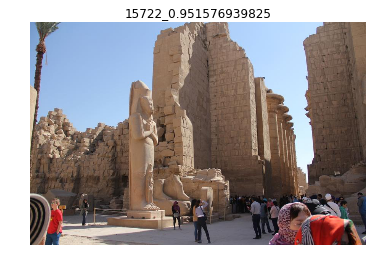

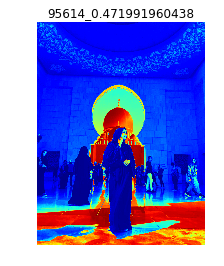

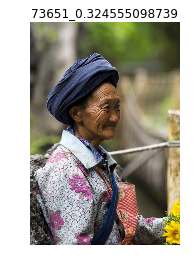

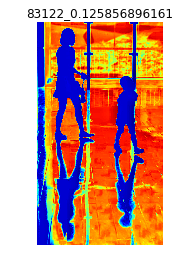

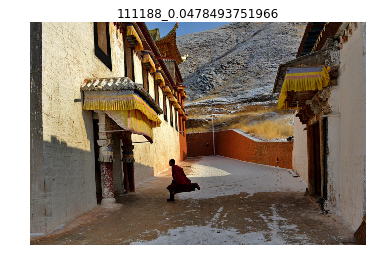

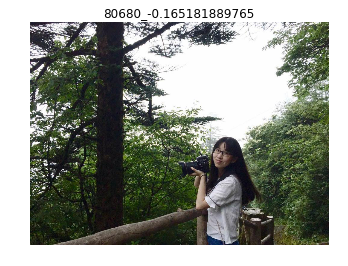

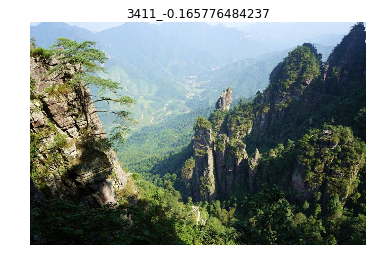

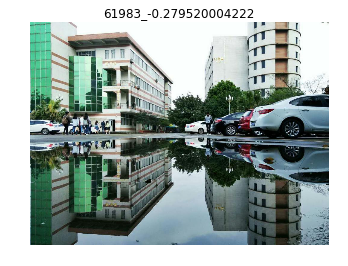

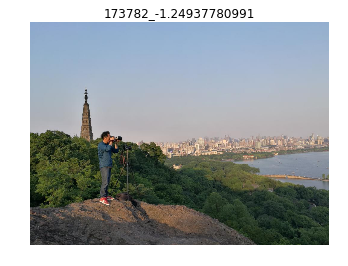

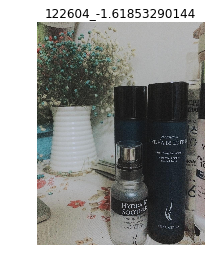

In [31]:
# 随机挑选几张照片展示
import os, random
import matplotlib.pyplot as plt

%matplotlib inline
def plot(imgid, title=""):
    if type(imgid) != str:
        imgid = str(int(imgid))
    img_file = "../data/img/%s.jpg"%imgid
    img = Image.open(img_file)
    plt.figure()
    plt.axis('off')
    plt.title(title)
    plt.imshow(img)
    plt.show()

img_path = "./data/train/none/"
all_imgs = os.listdir(img_path)
random.shuffle(all_imgs)
show_imgs = []
for img_filename in all_imgs[:10]:
    imgid, score = os.path.splitext(img_filename)[0].split("_")
    show_imgs.append((float(score), imgid))
for score, imgid in sorted(show_imgs, key=lambda x:x[0], reverse=True):
    plot(imgid, "%s_%s"%(imgid,score))

In [36]:
from keras.preprocessing.image import *
import os

img_path = "./data/sample/train/none/"
for imgfile in os.listdir(img_path):
    try:
        img = load_img(img_path+imgfile,
                           grayscale=False,
                           target_size=(224,224))
    except Exception, e:
        os.remove(img_path+imgfile)
        print "delete %s"%img_path+imgfile